In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from collections import OrderedDict
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

In [3]:
user1_pos = (2.0, 3.75, 0.0)
user2_pos = (5.5, 4.5, 0.0)
user3_pos = (5.5, 3.0, 0.0)
robot_pos = (15.0, 3.75, 0.0)

targets_pos = np.array([[4.0, 3.8, 2.5], [4.0, 3.7, 2.5]])

<IPython.core.display.Javascript object>


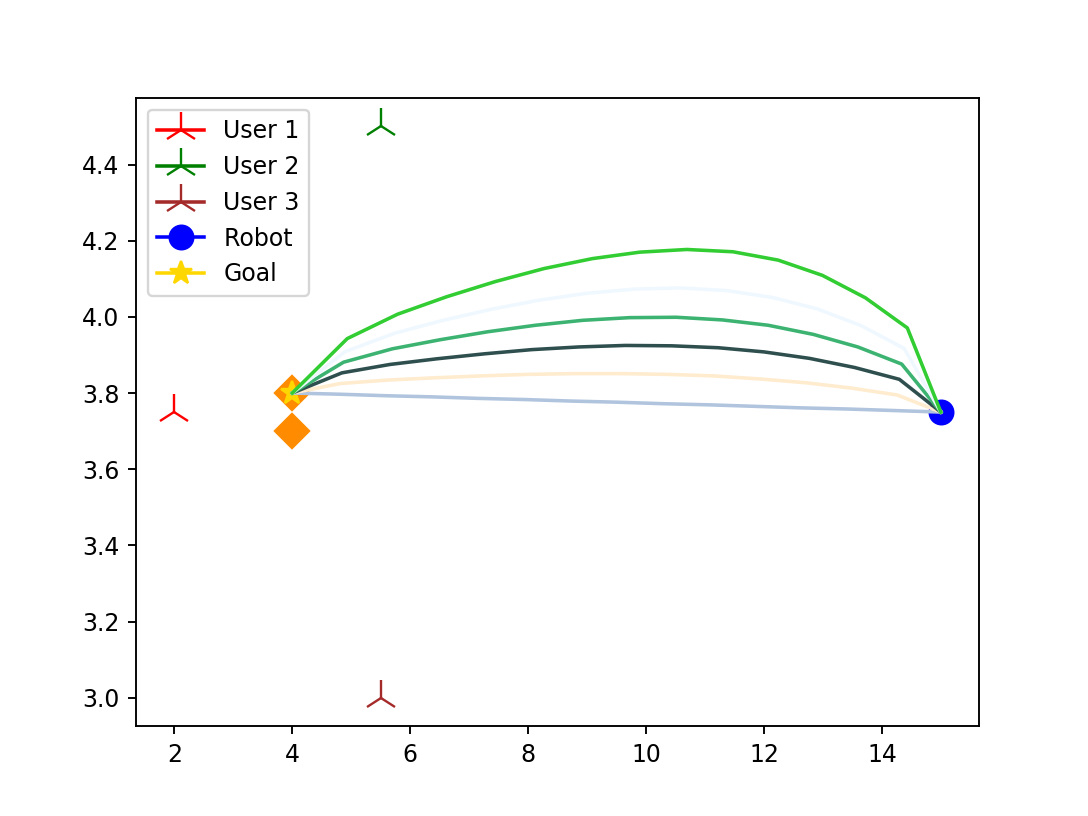

Legibilites Iteration 1:
User 1: 0.49894	User 2: 0.46404	User 3: 0.56859
Average: 0.51052

Legibilites Iteration 100:
User 1: 0.49895	User 2: 0.47488	User 3: 0.57793
Average: 0.51725

Legibilites Iteration 200:
User 1: 0.49896	User 2: 0.49142	User 3: 0.58489
Average: 0.52509

Legibilites Iteration 300:
User 1: 0.49898	User 2: 0.51735	User 3: 0.59029
Average: 0.53554

Legibilites Iteration 400:
User 1: 0.49899	User 2: 0.56200	User 3: 0.59483
Average: 0.55194

Legibilites Iteration 500:
User 1: 0.49900	User 2: 0.66340	User 3: 0.59955
Average: 0.58732

Legibilites Iteration 600:
User 1: nan	User 2: nan	User 3: nan
Average: nan

Legibilites Iteration 700:
User 1: nan	User 2: nan	User 3: nan
Average: nan

Legibilites Iteration 800:
User 1: nan	User 2: nan	User 3: nan
Average: nan

Legibilites Iteration 900:
User 1: nan	User 2: nan	User 3: nan
Average: nan

Legibilites Iteration 1000:
User 1: nan	User 2: nan	User 3: nan
Average: nan

Legibilites Iteration 2000:
User 1: nan	User 2: nan	User 3

In [4]:
reader = pd.read_csv('data/3_users_10000_1.csv')
trajectory = OrderedDict()
legibilities = OrderedDict()
for _, row in reader.iterrows():
    row_np = np.fromstring(row[1], dtype=float, sep=' ')
    leg_np = np.fromstring(row[2], dtype=float, sep=',')
    trajectory[int(row[0])] = row_np.reshape((int(len(row_np)/3), 3))
    legibilities[int(row[0])] = leg_np

color_names = ['lightsteelblue','blanchedalmond','darkslategrey','mediumseagreen','aliceblue',
               'limegreen','peru','beige','lightgray','darkblue','deepskyblue','magenta',
               'black','darkmagenta','blue','hotpink','indigo','firebrick','orange','chocolate','tomato']
i = 0
fig = plt.figure(1)
plt.clf()
plt.plot(user1_pos[0], user1_pos[1], color='red', marker='2', markersize=15, label='User 1')
plt.plot(user2_pos[0], user2_pos[1], color='green', marker='2', markersize=15, label='User 2')
plt.plot(user3_pos[0], user3_pos[1], color='brown', marker='2', markersize=15, label='User 3')
plt.plot(targets_pos[0, 0], targets_pos[0, 1], color='darkorange', marker='D', markersize=10)
plt.plot(targets_pos[1, 0], targets_pos[1, 1], color='darkorange', marker='D', markersize=10)
plt.plot(robot_pos[0], robot_pos[1], color='blue', marker='o', markersize=10, label='Robot')
plt.plot(targets_pos[0, 0], targets_pos[0, 1], color='gold', marker='*', markersize=10, label='Goal')
keys = sorted(trajectory.keys())
for key in keys:
    legibility_vals = legibilities[key]
    print('Legibilites Iteration %i:\nUser 1: %.5f\tUser 2: %.5f\tUser 3: %.5f\nAverage: %.5f\n' % 
          (key, legibility_vals[0], legibility_vals[1], legibility_vals[2], legibility_vals[3]))
    #if key < 2000:
    traj = trajectory[key]
    plt.plot(traj[:, 0], traj[:, 1], color=color_names[i], markersize=5)
    i += 1

plt.legend(loc='best')
fig.show()

<IPython.core.display.Javascript object>


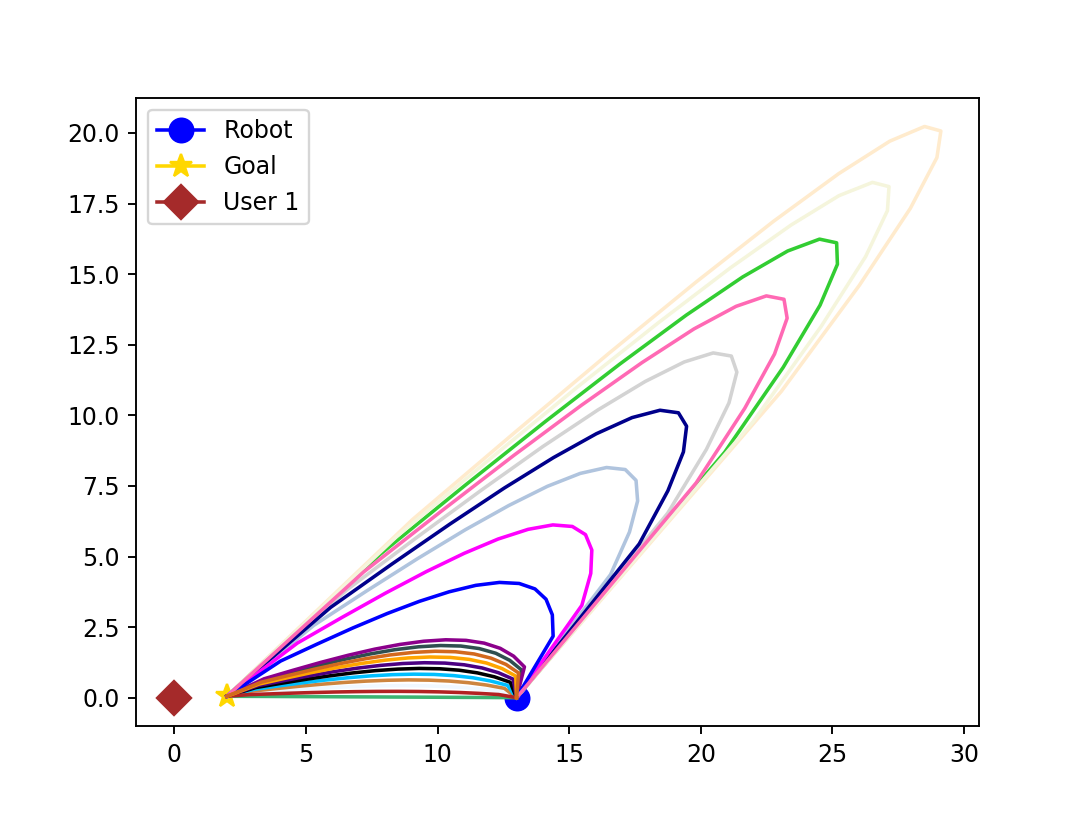

<IPython.core.display.Javascript object>


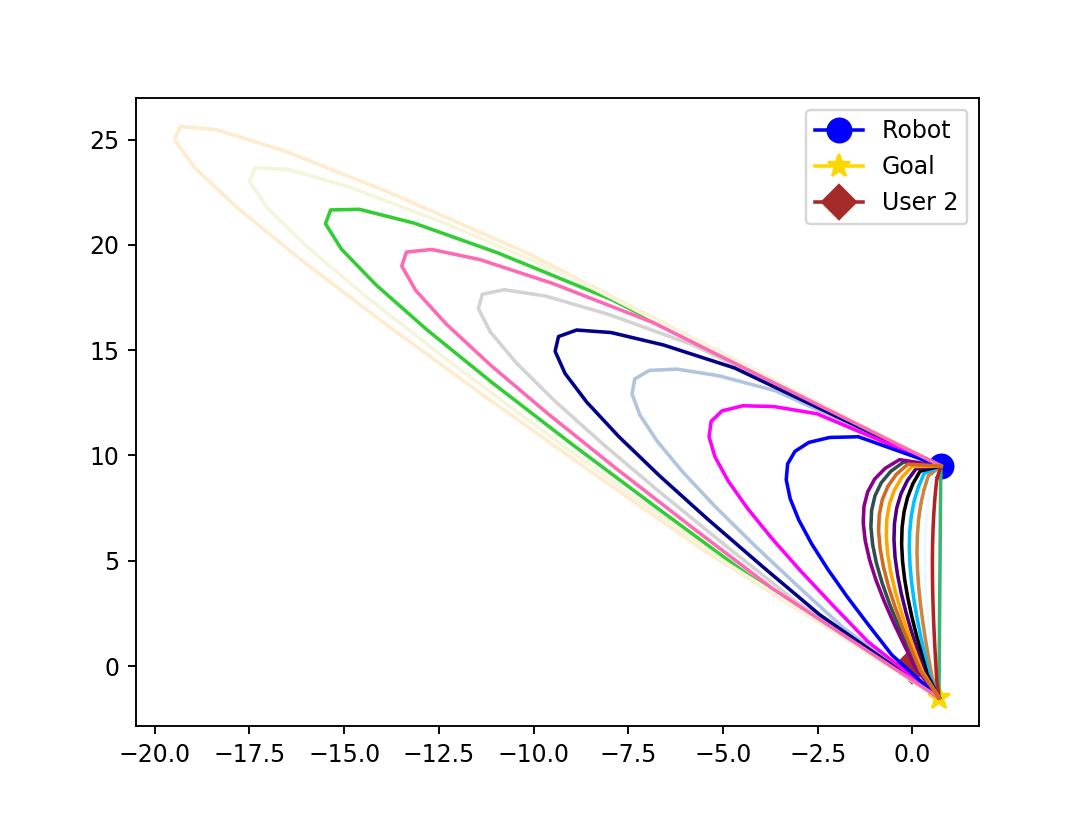

<IPython.core.display.Javascript object>


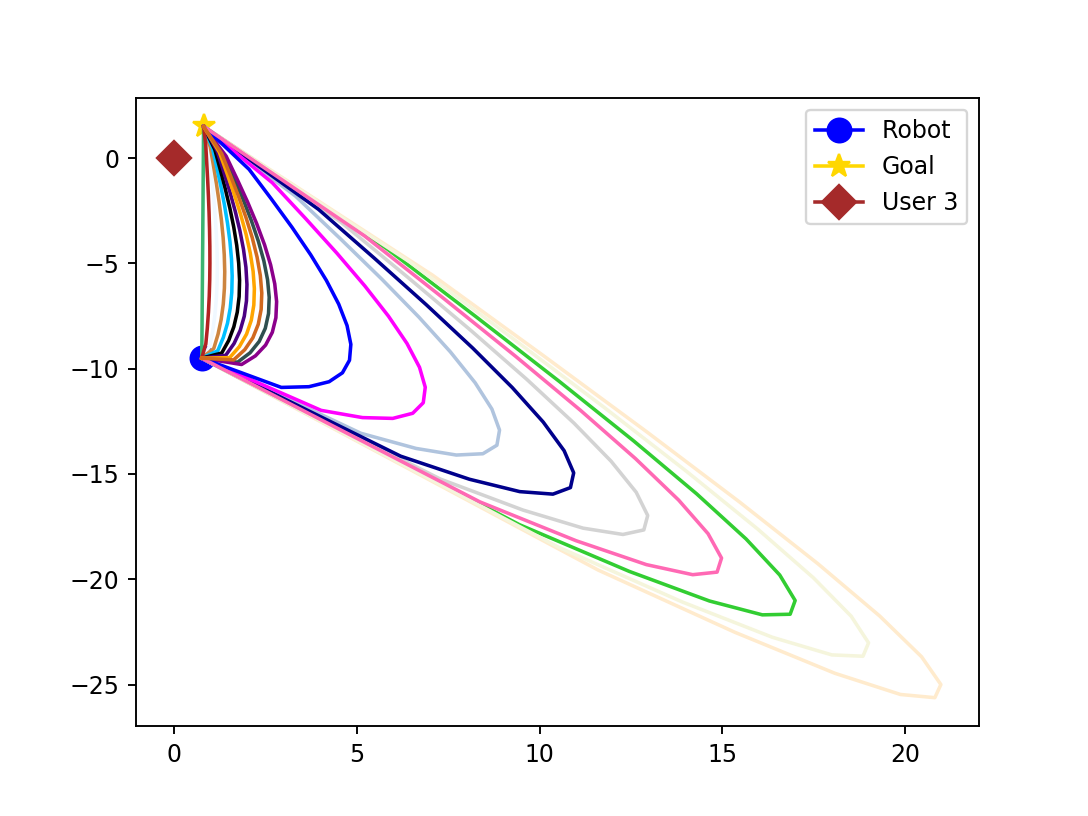

<IPython.core.display.Javascript object>


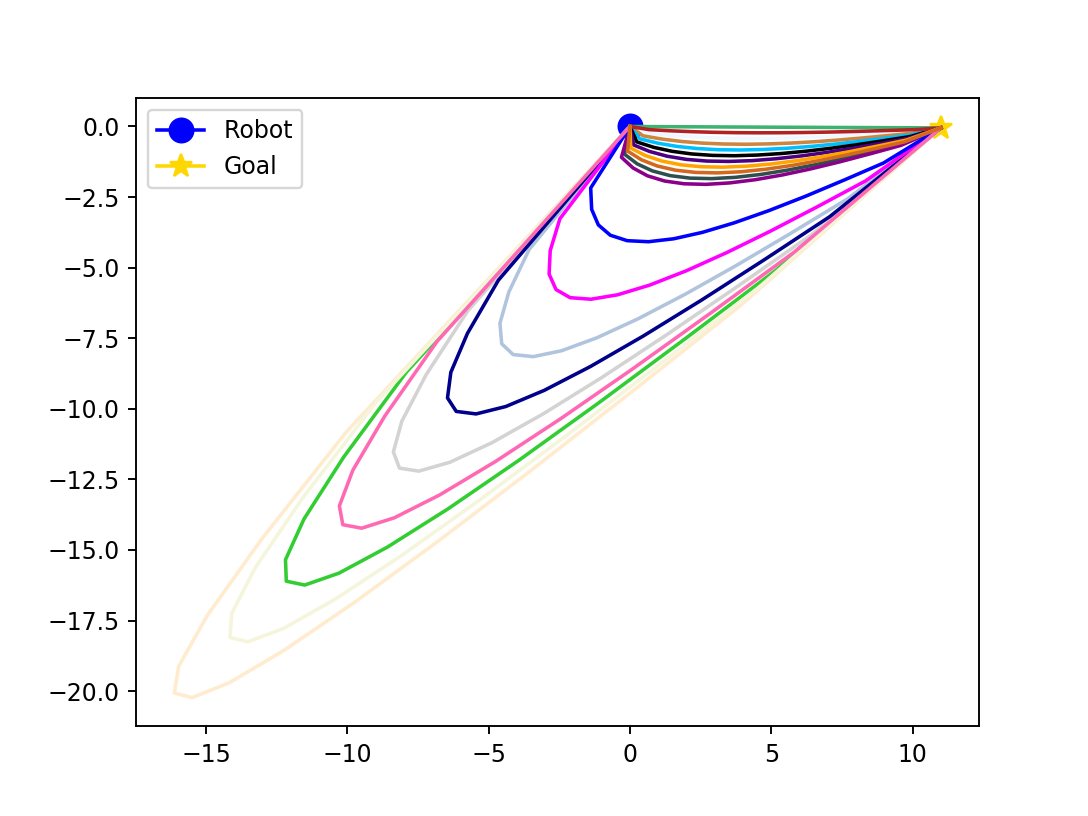

In [36]:
reader_u1 = pd.read_csv('data/3_users_10000_u1.csv', header=0)
reader_u2 = pd.read_csv('data/3_users_10000_u2.csv', header=0)
reader_u3 = pd.read_csv('data/3_users_10000_u3.csv', header=0)
reader_r = pd.read_csv('data/3_users_10000_r.csv', header=0)
u1_trajectories = OrderedDict()
for _, row in reader_u1.iterrows():
    row_np = np.fromstring(row[1], dtype=float, sep=' ')
    u1_trajectories[int(row[0])] = row_np.reshape((int(len(row_np)/3), 3))
u2_trajectories = OrderedDict()
for _, row in reader_u2.iterrows():
    row_np = np.fromstring(row[1], dtype=float, sep=' ')
    u2_trajectories[int(row[0])] = row_np.reshape((int(len(row_np)/3), 3))
u3_trajectories = OrderedDict()
for _, row in reader_u3.iterrows():
    row_np = np.fromstring(row[1], dtype=float, sep=' ')
    u3_trajectories[int(row[0])] = row_np.reshape((int(len(row_np)/3), 3))
r_trajectories = OrderedDict()
for _, row in reader_r.iterrows():
    row_np = np.fromstring(row[1], dtype=float, sep=' ')
    r_trajectories[int(row[0])] = row_np.reshape((int(len(row_np)/3), 3))

color_names = ['lightsteelblue','blanchedalmond','darkslategrey','mediumseagreen','aliceblue',
               'limegreen','peru','beige','lightgray','darkblue','deepskyblue','magenta',
               'black','darkmagenta','blue','hotpink','indigo','firebrick','orange','chocolate','tomato']

i = 0
fig = plt.figure('User 1')
plt.clf()
plt.plot(u1_trajectories[1][0, 2], u1_trajectories[1][0, 0], 
         color='blue', marker='o', markersize=10, label='Robot')
plt.plot(u1_trajectories[1][-1, 2], u1_trajectories[1][-1, 0], 
         color='gold', marker='*', markersize=10, label='Goal')
plt.plot(0, 0, color='brown', marker='D', markersize=10, label='User 1')
for key in u1_trajectories.keys():
    #if key < 5000:
    traj = u1_trajectories[key]
    plt.plot(traj[:, 2], traj[:, 0], color=color_names[i], markersize=5)
    i += 1

plt.legend(loc='best')
fig.show()

i = 0
fig = plt.figure('User 2')
plt.clf()
plt.plot(u2_trajectories[1][0, 2], u2_trajectories[1][0, 0], 
         color='blue', marker='o', markersize=10, label='Robot')
plt.plot(u2_trajectories[1][-1, 2], u2_trajectories[1][-1, 0], 
         color='gold', marker='*', markersize=10, label='Goal')
plt.plot(0, 0, color='brown', marker='D', markersize=10, label='User 2')
for key in u2_trajectories.keys():
    #if key < 5000:
    traj = u2_trajectories[key]
    plt.plot(traj[:, 2], traj[:, 0], color=color_names[i], markersize=5)
    i += 1

plt.legend(loc='best')
fig.show()

i = 0
fig = plt.figure('User 3')
plt.clf()
plt.plot(u3_trajectories[1][0, 2], u3_trajectories[1][0, 0], 
         color='blue', marker='o', markersize=10, label='Robot')
plt.plot(u3_trajectories[1][-1, 2], u3_trajectories[1][-1, 0], 
         color='gold', marker='*', markersize=10, label='Goal')
plt.plot(0, 0, color='brown', marker='D', markersize=10, label='User 3')
for key in u3_trajectories.keys():
    #if key < 5000:
    traj = u3_trajectories[key]
    plt.plot(traj[:, 2], traj[:, 0], color=color_names[i], markersize=5)
    i += 1

plt.legend(loc='best')
fig.show()

i = 0
fig = plt.figure('Robot')
plt.clf()
plt.plot(r_trajectories[1][0, 0], r_trajectories[1][0, 1], 
         color='blue', marker='o', markersize=10, label='Robot')
plt.plot(r_trajectories[1][-1, 0], r_trajectories[1][-1, 1], 
         color='gold', marker='*', markersize=10, label='Goal')
for key in r_trajectories.keys():
    #if key < 5000:
    traj = r_trajectories[key]
    plt.plot(traj[:, 0], traj[:, 1], color=color_names[i], markersize=5)
    i += 1

plt.legend(loc='best')
fig.show()

<IPython.core.display.Javascript object>


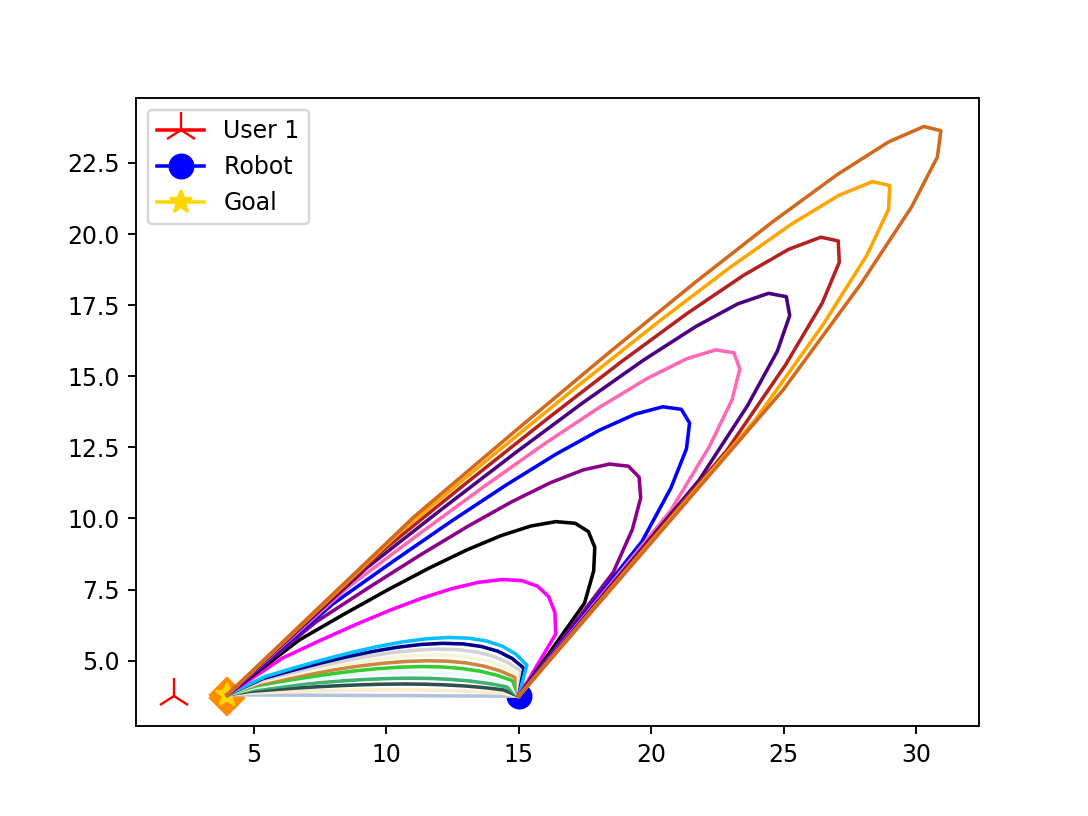

Legibility Iteration 1: 0.91866

Legibility Iteration 100: 0.91676

Legibility Iteration 200: 0.91485

Legibility Iteration 300: 0.91293

Legibility Iteration 400: 0.91102

Legibility Iteration 500: 0.90911

Legibility Iteration 600: 0.90720

Legibility Iteration 700: 0.90529

Legibility Iteration 800: 0.90338

Legibility Iteration 900: 0.90147

Legibility Iteration 1000: 0.89957

Legibility Iteration 2000: 0.88066

Legibility Iteration 3000: 0.86203

Legibility Iteration 4000: 0.84374

Legibility Iteration 5000: 0.82584

Legibility Iteration 6000: 0.80838

Legibility Iteration 7000: 0.79140

Legibility Iteration 8000: 0.77493

Legibility Iteration 9000: 0.75899

Legibility Iteration 10000: 0.74358



In [32]:
reader = pd.read_csv('data/user_1_10000.csv')
trajectory = OrderedDict()
legibilities = OrderedDict()
for _, row in reader.iterrows():
    row_np = np.fromstring(row[1], dtype=float, sep=' ')
    leg_np = np.fromstring(row[2], dtype=float, sep=', ')
    trajectory[int(row[0])] = row_np.reshape((int(len(row_np)/3), 3))
    legibilities[int(row[0])] = leg_np

color_names = ['lightsteelblue','blanchedalmond','darkslategrey','mediumseagreen','aliceblue',
               'limegreen','peru','beige','lightgray','darkblue','deepskyblue','magenta',
               'black','darkmagenta','blue','hotpink','indigo','firebrick','orange','chocolate','tomato']
i = 0
fig = plt.figure(2)
plt.clf()
plt.plot(user1_pos[0], user1_pos[1], color='red', marker='2', markersize=15, label='User 1')
plt.plot(targets_pos[0, 0], targets_pos[0, 1], color='darkorange', marker='D', markersize=10)
plt.plot(targets_pos[1, 0], targets_pos[1, 1], color='darkorange', marker='D', markersize=10)
plt.plot(robot_pos[0], robot_pos[1], color='blue', marker='o', markersize=10, label='Robot')
plt.plot(targets_pos[0, 0], targets_pos[0, 1], color='gold', marker='*', markersize=10, label='Goal')
for key in sorted(trajectory.keys()):
    legibility_vals = legibilities[key]
    print('Legibility Iteration %i: %.5f\n' % (key, legibility_vals[0]))
    traj = trajectory[key]
    plt.plot(traj[:, 0], traj[:, 1], color=color_names[i], markersize=5)
    i += 1

plt.legend(loc='best')
fig.show()

<IPython.core.display.Javascript object>


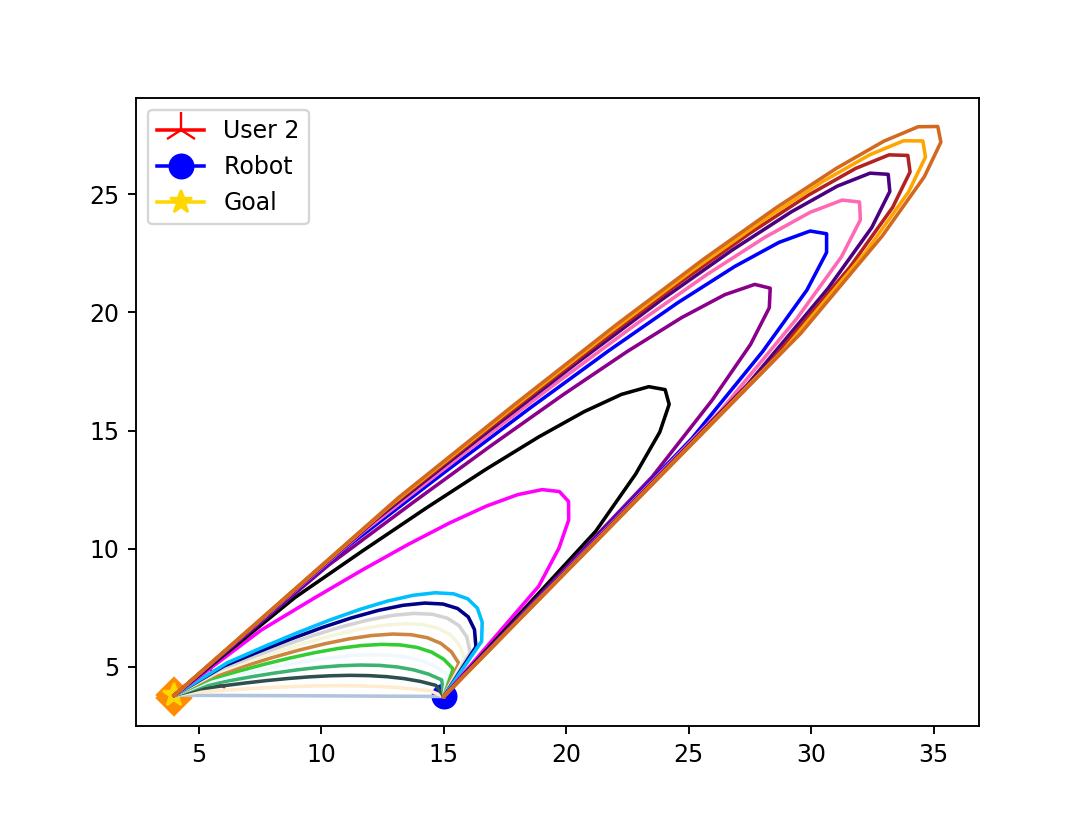

Legibility Iteration 1: 0.91690

Legibility Iteration 100: 0.91993

Legibility Iteration 200: 0.92299

Legibility Iteration 300: 0.92604

Legibility Iteration 400: 0.92910

Legibility Iteration 500: 0.93216

Legibility Iteration 600: 0.93522

Legibility Iteration 700: 0.93828

Legibility Iteration 800: 0.94134

Legibility Iteration 900: 0.94440

Legibility Iteration 1000: 0.94746

Legibility Iteration 2000: 0.97794

Legibility Iteration 3000: 1.00801

Legibility Iteration 4000: nan

Legibility Iteration 5000: nan

Legibility Iteration 6000: nan

Legibility Iteration 7000: nan

Legibility Iteration 8000: nan

Legibility Iteration 9000: nan

Legibility Iteration 10000: nan



In [33]:
reader = pd.read_csv('data/user_2_10000.csv')
trajectory = OrderedDict()
legibilities = OrderedDict()
for _, row in reader.iterrows():
    row_np = np.fromstring(row[1], dtype=float, sep=' ')
    leg_np = np.fromstring(row[2], dtype=float, sep=', ')
    trajectory[int(row[0])] = row_np.reshape((int(len(row_np)/3), 3))
    legibilities[int(row[0])] = leg_np

color_names = ['lightsteelblue','blanchedalmond','darkslategrey','mediumseagreen','aliceblue',
               'limegreen','peru','beige','lightgray','darkblue','deepskyblue','magenta',
               'black','darkmagenta','blue','hotpink','indigo','firebrick','orange','chocolate','tomato']
i = 0
fig = plt.figure(3)
plt.clf()
plt.plot(user2_pos[0], user2_pos[1], color='red', marker='2', markersize=15, label='User 2')
plt.plot(targets_pos[0, 0], targets_pos[0, 1], color='darkorange', marker='D', markersize=10)
plt.plot(targets_pos[1, 0], targets_pos[1, 1], color='darkorange', marker='D', markersize=10)
plt.plot(robot_pos[0], robot_pos[1], color='blue', marker='o', markersize=10, label='Robot')
plt.plot(targets_pos[0, 0], targets_pos[0, 1], color='gold', marker='*', markersize=10, label='Goal')
for key in sorted(trajectory.keys()):
    legibility_vals = legibilities[key]
    print('Legibility Iteration %i: %.5f\n' % (key, legibility_vals[0]))
    traj = trajectory[key]
    plt.plot(traj[:, 0], traj[:, 1], color=color_names[i], markersize=5)
    i += 1

plt.legend(loc='best')
fig.show()

<IPython.core.display.Javascript object>


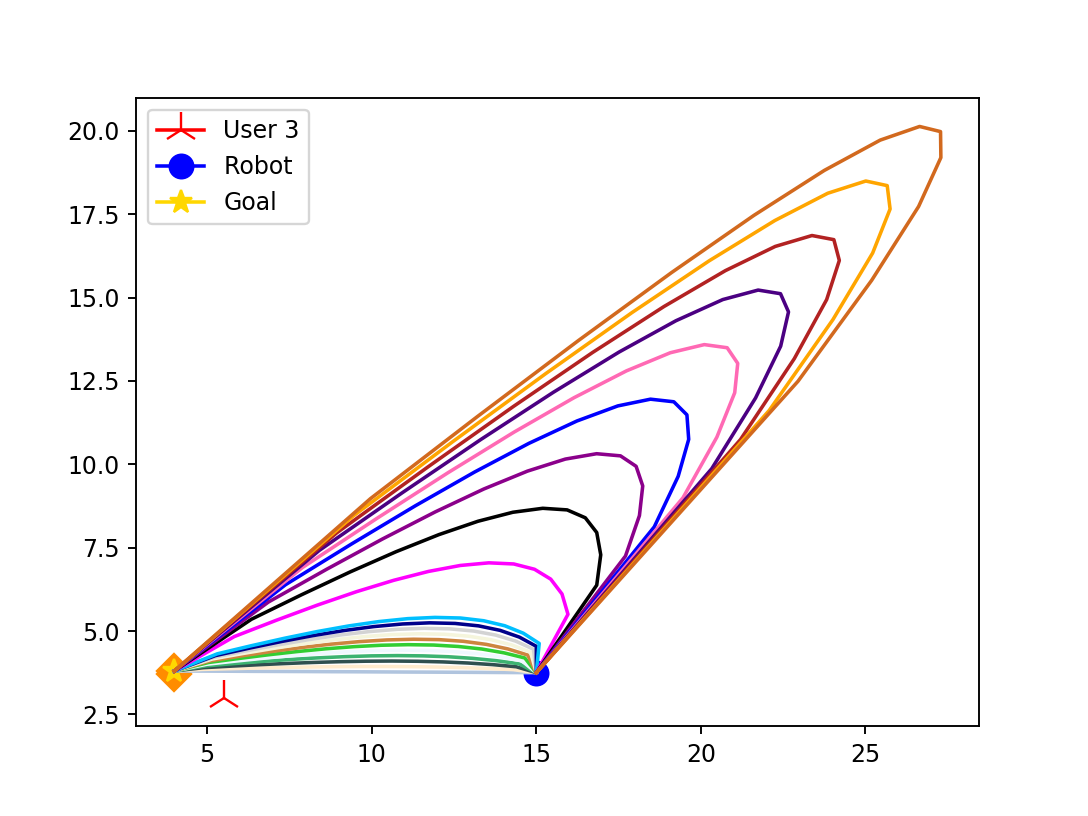

Legibility Iteration 1: 0.97511

Legibility Iteration 100: 0.97538

Legibility Iteration 200: 0.97566

Legibility Iteration 300: 0.97593

Legibility Iteration 400: 0.97621

Legibility Iteration 500: 0.97648

Legibility Iteration 600: 0.97675

Legibility Iteration 700: 0.97702

Legibility Iteration 800: 0.97730

Legibility Iteration 900: 0.97757

Legibility Iteration 1000: 0.97784

Legibility Iteration 2000: 0.98054

Legibility Iteration 3000: 0.98320

Legibility Iteration 4000: 0.98581

Legibility Iteration 5000: 0.98837

Legibility Iteration 6000: 0.99087

Legibility Iteration 7000: 0.99332

Legibility Iteration 8000: 0.99570

Legibility Iteration 9000: 0.99801

Legibility Iteration 10000: 1.00024



In [34]:
reader = pd.read_csv('data/user_3_10000.csv')
trajectory = OrderedDict()
legibilities = OrderedDict()
for _, row in reader.iterrows():
    row_np = np.fromstring(row[1], dtype=float, sep=' ')
    leg_np = np.fromstring(row[2], dtype=float, sep=', ')
    trajectory[int(row[0])] = row_np.reshape((int(len(row_np)/3), 3))
    legibilities[int(row[0])] = leg_np

color_names = ['lightsteelblue','blanchedalmond','darkslategrey','mediumseagreen','aliceblue',
               'limegreen','peru','beige','lightgray','darkblue','deepskyblue','magenta',
               'black','darkmagenta','blue','hotpink','indigo','firebrick','orange','chocolate','tomato']
i = 0
fig = plt.figure(4)
plt.clf()
plt.plot(user3_pos[0], user3_pos[1], color='red', marker='2', markersize=15, label='User 3')
plt.plot(targets_pos[0, 0], targets_pos[0, 1], color='darkorange', marker='D', markersize=10)
plt.plot(targets_pos[1, 0], targets_pos[1, 1], color='darkorange', marker='D', markersize=10)
plt.plot(robot_pos[0], robot_pos[1], color='blue', marker='o', markersize=10, label='Robot')
plt.plot(targets_pos[0, 0], targets_pos[0, 1], color='gold', marker='*', markersize=10, label='Goal')
for key in sorted(trajectory.keys()):
    legibility_vals = legibilities[key]
    print('Legibility Iteration %i: %.5f\n' % (key, legibility_vals[0]))
    traj = trajectory[key]
    plt.plot(traj[:, 0], traj[:, 1], color=color_names[i], markersize=5)
    i += 1

plt.legend(loc='best')
fig.show()

In [24]:
reader = pd.read_csv('data/2_users_1_2_10000.csv')
trajectory = OrderedDict()
legibilities = OrderedDict()
for _, row in reader.iterrows():
    row_np = np.fromstring(row[1], dtype=float, sep=' ')
    leg_np = np.fromstring(row[2], dtype=float, sep=', ')
    trajectory[int(row[0])] = row_np.reshape((int(len(row_np)/3), 3))
    legibilities[int(row[0])] = leg_np

color_names = ['lightsteelblue','blanchedalmond','darkslategrey','mediumseagreen','aliceblue',
               'limegreen','peru','beige','lightgray','darkblue','deepskyblue','magenta',
               'black','darkmagenta','blue','hotpink','indigo','firebrick','orange','chocolate','tomato']
i = 0
fig = plt.figure(5)
plt.clf()
plt.plot(user1_pos[0], user1_pos[1], color='red', marker='2', markersize=15, label='User 1')
plt.plot(user2_pos[0], user2_pos[1], color='green', marker='2', markersize=15, label='User 2')
plt.plot(targets_pos[0, 0], targets_pos[0, 1], color='darkorange', marker='D', markersize=10)
plt.plot(targets_pos[1, 0], targets_pos[1, 1], color='darkorange', marker='D', markersize=10)
plt.plot(robot_pos[0], robot_pos[1], color='blue', marker='o', markersize=10, label='Robot')
plt.plot(targets_pos[0, 0], targets_pos[0, 1], color='gold', marker='*', markersize=10, label='Goal')
for key in sorted(trajectory.keys()):
    legibility_vals = legibilities[key]
    print('Legibility Iteration %i: %.5f\n' % (key, legibility_vals[0]))
    traj = trajectory[key]
    plt.plot(traj[:, 0], traj[:, 1], color=color_names[i], markersize=5)
    i += 1

plt.legend(loc='best')
fig.show()

Legibility Iteration 1: 0.91866

Legibility Iteration 100: 0.91663

Legibility Iteration 200: 0.91457

Legibility Iteration 300: 0.91252

Legibility Iteration 400: 0.91047

Legibility Iteration 500: 0.90842

Legibility Iteration 600: 0.90637

Legibility Iteration 700: 0.90432

Legibility Iteration 800: 0.90227

Legibility Iteration 900: 0.90023

Legibility Iteration 1000: 0.89819

Legibility Iteration 2000: 0.87767

Legibility Iteration 3000: 0.85728

Legibility Iteration 4000: 0.83726

Legibility Iteration 5000: 0.81765

Legibility Iteration 6000: 0.79852

Legibility Iteration 7000: 0.77989

Legibility Iteration 8000: 0.76181

Legibility Iteration 9000: 0.74430

Legibility Iteration 10000: 0.72738



<IPython.core.display.Javascript object>


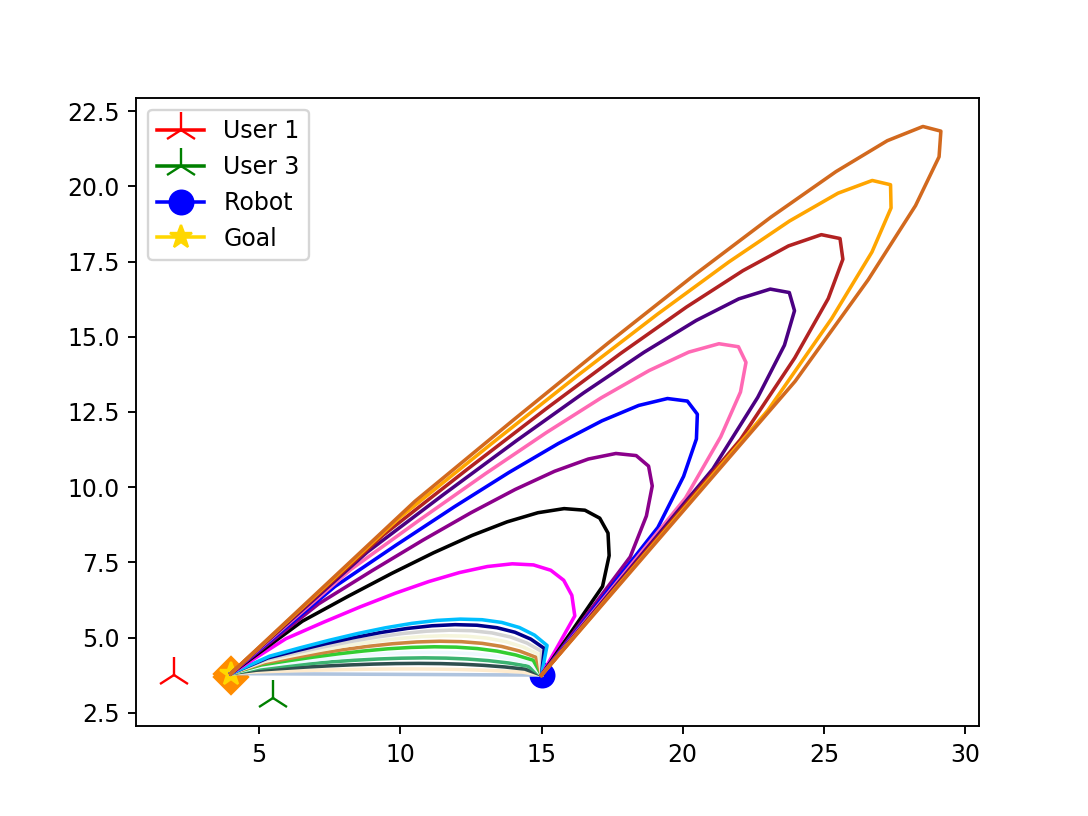

Legibility Iteration 1: 0.91866

Legibility Iteration 100: 0.91696

Legibility Iteration 200: 0.91523

Legibility Iteration 300: 0.91351

Legibility Iteration 400: 0.91178

Legibility Iteration 500: 0.91006

Legibility Iteration 600: 0.90834

Legibility Iteration 700: 0.90662

Legibility Iteration 800: 0.90490

Legibility Iteration 900: 0.90318

Legibility Iteration 1000: 0.90147

Legibility Iteration 2000: 0.88439

Legibility Iteration 3000: 0.86751

Legibility Iteration 4000: 0.85085

Legibility Iteration 5000: 0.83446

Legibility Iteration 6000: 0.81837

Legibility Iteration 7000: 0.80261

Legibility Iteration 8000: 0.78720

Legibility Iteration 9000: 0.77217

Legibility Iteration 10000: 0.75753



In [25]:
reader = pd.read_csv('data/2_users_1_3_10000.csv')
trajectory = OrderedDict()
legibilities = OrderedDict()
for _, row in reader.iterrows():
    row_np = np.fromstring(row[1], dtype=float, sep=' ')
    leg_np = np.fromstring(row[2], dtype=float, sep=', ')
    trajectory[int(row[0])] = row_np.reshape((int(len(row_np)/3), 3))
    legibilities[int(row[0])] = leg_np

color_names = ['lightsteelblue','blanchedalmond','darkslategrey','mediumseagreen','aliceblue',
               'limegreen','peru','beige','lightgray','darkblue','deepskyblue','magenta',
               'black','darkmagenta','blue','hotpink','indigo','firebrick','orange','chocolate','tomato']
i = 0
fig = plt.figure(6)
plt.clf()
plt.plot(user1_pos[0], user1_pos[1], color='red', marker='2', markersize=15, label='User 1')
plt.plot(user3_pos[0], user3_pos[1], color='green', marker='2', markersize=15, label='User 3')
plt.plot(targets_pos[0, 0], targets_pos[0, 1], color='darkorange', marker='D', markersize=10)
plt.plot(targets_pos[1, 0], targets_pos[1, 1], color='darkorange', marker='D', markersize=10)
plt.plot(robot_pos[0], robot_pos[1], color='blue', marker='o', markersize=10, label='Robot')
plt.plot(targets_pos[0, 0], targets_pos[0, 1], color='gold', marker='*', markersize=10, label='Goal')
for key in sorted(trajectory.keys()):
    legibility_vals = legibilities[key]
    print('Legibility Iteration %i: %.5f\n' % (key, legibility_vals[0]))
    traj = trajectory[key]
    plt.plot(traj[:, 0], traj[:, 1], color=color_names[i], markersize=5)
    i += 1

plt.legend(loc='best')
fig.show()

<IPython.core.display.Javascript object>


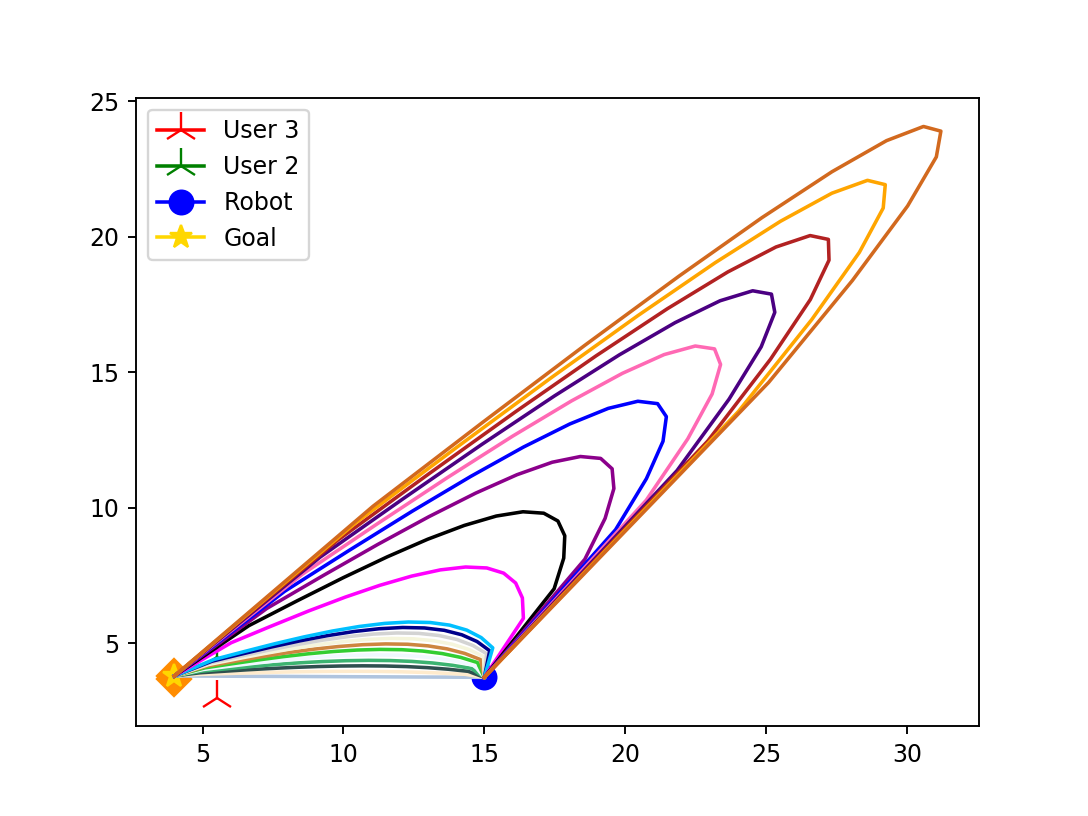

Legibility Iteration 1: 0.94772

Legibility Iteration 100: 0.94805

Legibility Iteration 200: 0.94838

Legibility Iteration 300: 0.94871

Legibility Iteration 400: 0.94904

Legibility Iteration 500: 0.94937

Legibility Iteration 600: 0.94970

Legibility Iteration 700: 0.95002

Legibility Iteration 800: 0.95035

Legibility Iteration 900: 0.95068

Legibility Iteration 1000: 0.95101

Legibility Iteration 2000: 0.95435

Legibility Iteration 3000: 0.95774

Legibility Iteration 4000: 0.96108

Legibility Iteration 5000: 0.96437

Legibility Iteration 6000: 0.96760

Legibility Iteration 7000: 0.97076

Legibility Iteration 8000: 0.97383

Legibility Iteration 9000: 0.97681

Legibility Iteration 10000: 0.97964



In [26]:
reader = pd.read_csv('data/2_users_2_3_10000.csv')
trajectory = OrderedDict()
legibilities = OrderedDict()
for _, row in reader.iterrows():
    row_np = np.fromstring(row[1], dtype=float, sep=' ')
    leg_np = np.fromstring(row[2], dtype=float, sep=', ')
    trajectory[int(row[0])] = row_np.reshape((int(len(row_np)/3), 3))
    legibilities[int(row[0])] = leg_np

color_names = ['lightsteelblue','blanchedalmond','darkslategrey','mediumseagreen','aliceblue',
               'limegreen','peru','beige','lightgray','darkblue','deepskyblue','magenta',
               'black','darkmagenta','blue','hotpink','indigo','firebrick','orange','chocolate','tomato']
i = 0
fig = plt.figure(7)
plt.clf()
plt.plot(user3_pos[0], user3_pos[1], color='red', marker='2', markersize=15, label='User 3')
plt.plot(user2_pos[0], user2_pos[1], color='green', marker='2', markersize=15, label='User 2')
plt.plot(targets_pos[0, 0], targets_pos[0, 1], color='darkorange', marker='D', markersize=10)
plt.plot(targets_pos[1, 0], targets_pos[1, 1], color='darkorange', marker='D', markersize=10)
plt.plot(robot_pos[0], robot_pos[1], color='blue', marker='o', markersize=10, label='Robot')
plt.plot(targets_pos[0, 0], targets_pos[0, 1], color='gold', marker='*', markersize=10, label='Goal')
for key in sorted(trajectory.keys()):
    legibility_vals = legibilities[key]
    print('Legibility Iteration %i: %.5f\n' % (key, legibility_vals[0]))
    traj = trajectory[key]
    plt.plot(traj[:, 0], traj[:, 1], color=color_names[i], markersize=5)
    i += 1

plt.legend(loc='best')
fig.show()

In [5]:
trajectories = np.array([
    [[1500., 2500., 250.],
     [1293.407661758, 2461.581483147, 227.77104721],
     [1207.181122211, 2417.336475339, 230.119698167],
     [1134.812295956, 2373.092303627, 241.38706006],
     [1074.782676918, 2328.336485673, 260.449432575],
     [1025.871676095, 2282.664475483, 285.728057065],
     [987.12348675, 2235.792652797, 315.361996137],
     [957.787898961, 2187.553068289, 347.337783289],
     [937.255258996, 2137.877675625, 379.572497253],
     [924.997564298, 2086.776761057, 409.960217423],
     [920.52193816, 2034.314325198, 436.398752632],
     [923.340278127, 1980.582425283, 456.817965122],
     [932.957948127, 1925.677026019, 469.236549401],
     [948.880391168, 1869.679232874, 471.883183496],
     [970.622728016, 1812.645766377, 463.430319483],
     [997.680085642, 1754.609637817, 443.394123316],
     [1029.386629782, 1695.591455528, 412.717480759],
     [1064.605934447, 1635.637631325, 374.396110062],
     [1101.477221454, 1574.998627378, 333.154340096],
     [1200., 1500., 250.]],
    [[1500., 2500., 250.],
     [1302.844354227, 2442.665204086, 264.582014294],
     [1214.2561856, 2388.519638027, 303.321853876],
     [1138.239102617, 2334.559879908, 344.894160591],
     [1075.136955875, 2280.715101636, 388.004163644],
     [1024.993871177, 2227.042849923, 431.312246396],
     [987.519187851, 2173.683187823, 473.332760599],
     [962.08364877, 2120.788897959, 512.392496867],
     [947.738071978, 2068.449671181, 546.677898334],
     [943.255358806, 2016.631543936, 574.36485305],
     [947.20452095, 1965.156791431, 593.788771249],
     [958.057005506, 1913.746158771, 603.586232288],
     [974.302411483, 1862.120047955, 602.742139632],
     [994.540916949, 1810.118849252, 590.514815636],
     [1017.546606473, 1757.794012484, 566.258731853],
     [1042.341849371, 1705.445272002, 529.222975812],
     [1068.341427169, 1653.577431617, 478.604038381],
     [1095.491132748, 1602.64464602, 414.679747237],
     [1123.622296681, 1552.310775196, 342.647350887],
     [1200., 1500., 250.]],
    [[1500., 2500., 250.],
     [1354.284097421, 2445.637754758, 283.455051847],
     [1259.080481677, 2392.596558903, 304.451757507],
     [1172.065402103, 2339.59827928, 328.542180922],
     [1094.032543701, 2286.486687795, 355.562170098],
     [1025.632043851, 2233.169960897, 384.878365999],
     [967.418990463, 2179.65136643, 415.249281538],
     [919.91208173, 2126.045329664, 444.772941374],
     [883.633197115, 2072.564533418, 470.992092362],
     [859.093736461, 2019.466291206, 491.213804691],
     [846.705250905, 1966.961311478, 503.033269141],
     [846.626496123, 1915.116187079, 504.924149115],
     [858.6051584, 1863.804531541, 496.635927685],
     [881.893241954, 1812.746962147, 479.170577118],
     [915.27719371, 1761.621948277, 454.359483391],
     [957.192161887, 1710.182280852, 424.313163333],
     [1005.855754822, 1658.323912617, 391.008352173],
     [1059.385836355, 1606.098608499, 356.072984225],
     [1115.920121195, 1553.685136818, 320.651983502],
     [1200., 1500., 250.]],
    [[1500., 2500., 250.],
     [1185.337753341, 2498.910041125, 127.551148069],
     [1104.29029115, 2473.946743345, 108.252439697],
     [1040.778314054, 2446.988699215, 110.694081193],
     [988.621641624, 2417.307550635, 129.404691245],
     [944.345134123, 2384.588778273, 160.271874299],
     [906.178525642, 2348.691965591, 200.176716629],
     [873.438767837, 2309.535901268, 246.531159342],
     [846.139225875, 2267.054262359, 296.909733523],
     [824.73743493, 2221.183363974, 348.79349175],
     [809.965950806, 2171.861185513, 399.396735434],
     [802.704545946, 2119.026673052, 445.550280983],
     [803.860437614, 2062.608714179, 483.644870202],
     [814.233830241, 2002.48874837, 509.704511997],
     [834.362196196, 1938.424865662, 519.788712447],
     [864.343933267, 1869.968064249, 511.119781921],
     [903.558881863, 1796.512161485, 484.309796054],
     [949.995140424, 1717.845044495, 444.490643235],
     [999.736147485, 1635.493868593, 396.609404575],
     [1200., 1500., 250.]],
    [[1500., 2500., 250.],
     [1160.366094429, 2342.454246246, 413.652112871],
     [991.471691292, 2238.759862477, 533.253747636],
     [849.157688027, 2136.701531616, 660.493265145],
     [735.180639921, 2039.329316348, 790.015824897],
     [649.91694142, 1952.164695828, 909.231564002],
     [591.681567022, 1880.44442964, 1003.712869306],
     [558.064571668, 1823.608002428, 1069.956144695],
     [545.920862742, 1777.01288768, 1111.010127893],
     [553.59078341, 1737.532186761, 1129.84050085],
     [581.732594212, 1704.819511418, 1127.881390831],
     [621.51702206, 1673.150366257, 1108.09100507],
     [670.665903795, 1642.32070073, 1070.986944422],
     [727.361383355, 1612.751295393, 1016.502709593],
     [790.059266816, 1584.947406862, 944.176489522],
     [857.55329082, 1559.277431458, 853.222262131],
     [929.028938413, 1535.890641301, 742.584002238],
     [1004.050630568, 1514.771503887, 610.391570714],
     [1083.152343173, 1496.311838458, 451.137002101],
     [1200., 1500., 250.]],
    [[1500., 2500., 250.],
     [1183.487986475, 2445.772421582, 285.196142079],
     [1073.045241265, 2393.737738974, 339.791206126],
     [983.724277325, 2342.271939326, 399.828547798],
     [915.45500621, 2291.578714059, 462.390316283],
     [867.587228115, 2242.005179435, 523.99165576],
     [838.764395268, 2193.860642891, 580.799989712],
     [826.885308886, 2147.197679349, 629.135583796],
     [829.196430874, 2101.609681915, 666.093537935],
     [842.55875372, 2056.193821497, 689.953655252],
     [863.837954391, 2009.812598084, 700.117988178],
     [890.241955337, 1961.505014498, 696.73442062],
     [919.480408324, 1910.746802515, 680.348245557],
     [949.768826164, 1857.476170895, 651.671236814],
     [979.757881878, 1802.008876837, 611.34847162],
     [1008.46447572, 1744.978321173, 559.567597775],
     [1035.331932185, 1687.351576461, 495.517406847],
     [1060.573880855, 1630.244230524, 418.143719963],
     [1084.472673909, 1573.55252829, 333.065647434],
     [1200., 1500., 250.]],
    [[1500., 2500., 250.],
     [1380.871182369, 2399.456010921, 303.209837029],
     [1296.198472562, 2299.844882853, 332.776061511],
     [1217.852302571, 2202.861623374, 364.430155982],
     [1146.605141213, 2109.511877266, 397.779989924],
     [1083.112703333, 2020.70471456, 431.770310278],
     [1028.0176202, 1937.298335054, 464.490892175],
     [982.081076722, 1860.154438417, 493.183888502],
     [946.249853888, 1790.151614415, 514.66072138],
     [921.528492062, 1728.097616823, 526.220751603],
     [908.615414773, 1674.53956484, 526.723321505],
     [907.516594813, 1629.596656499, 516.987453835],
     [917.481738163, 1592.963876014, 499.093863921],
     [937.280787156, 1564.048138451, 475.306658367],
     [965.508717173, 1542.081846732, 447.46682137],
     [1000.736409123, 1526.162215235, 416.911259965],
     [1041.543152519, 1515.258780201, 384.60592],
     [1086.509233547, 1508.227529713, 351.292578212],
     [1134.213809863, 1503.838416054, 317.580191089],
     [1200., 1500., 250.]],
    [[1500., 2500., 250.],
     [1207.266322933, 2448.54311258, 160.085320811],
     [1130.359417916, 2375.136762107, 156.602745625],
     [1065.089647018, 2302.558408879, 175.359578047],
     [1006.263673948, 2231.322084668, 210.398803222],
     [952.421877572, 2162.258736884, 256.51665767],
     [904.130002962, 2096.228008075, 309.104529702],
     [862.808652504, 2033.963776179, 364.007317638],
     [830.005679854, 1975.98395304, 417.518432287],
     [806.988766839, 1922.534309554, 466.441676963],
     [794.55375205, 1873.566928308, 508.130512032],
     [792.970932481, 1828.760814334, 540.451942553],
     [802.007152179, 1787.581257383, 561.683763492],
     [820.969576257, 1749.361217954, 570.413760328],
     [848.732566849, 1713.386840919, 565.534538519],
     [883.74160148, 1678.979341585, 546.423491961],
     [924.050788667, 1645.563746614, 513.557079991],
     [967.486378572, 1612.736965023, 470.189614881],
     [1011.640782405, 1580.664306156, 420.305411008],
     [1200., 1500., 250.]],
])
user1_translation = (1500.0, 1000.0, 1000.0)
user2_translation = (500.0, 1500.0, 1000.0)
user3_translation = (2500.0, 1500.0, 1000.0)
robot_translation = (1500.0, 2500.0, 250.0)
targets = {'A': np.array([1200.0, 1500.0, 250.0]), 'B': np.array([1500.0, 1500.0, 250.0]),
           'C': np.array([1800.0, 1500.0, 250.0])}
colors = ['black', 'blue', 'green', 'cyan', 'red', 'orange', 'brown', 'pink']
names = ['Base', 'Height', 'Right', 'Left', 'Right Height', 'Left Height', 'Right Spring', 'Left Spring']

<IPython.core.display.Javascript object>


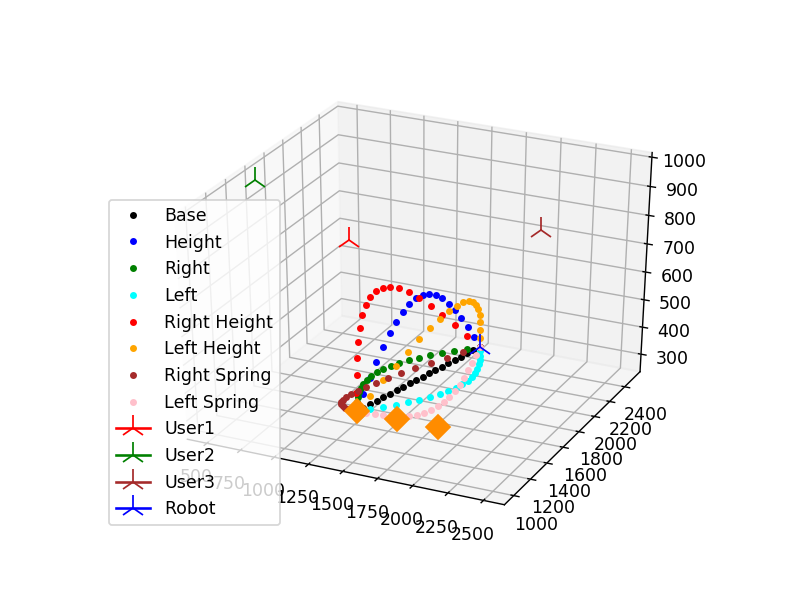

In [10]:
n_points = 20
optim_target = 'A'
traj_x = np.linspace(robot_translation[0], targets[optim_target][0], num=n_points)[:, None]
traj_y = np.linspace(robot_translation[1], targets[optim_target][1], num=n_points)[:, None]
traj_z = np.linspace(targets[optim_target][2], targets[optim_target][2], num=n_points)[:, None]
offset_modulator = 300 * np.sin(np.linspace(0, np.pi, num=n_points))[:, None]

base_traj = np.hstack((traj_x, traj_y, traj_z))
h_mod_traj = np.hstack((traj_x, traj_y, traj_z + offset_modulator))
r_mod_traj = np.hstack((traj_x - offset_modulator, traj_y, traj_z))
l_mod_traj = np.hstack((traj_x + offset_modulator, traj_y, traj_z))
hr_mod_traj = np.hstack((traj_x - offset_modulator, traj_y, traj_z + offset_modulator))
hl_mod_traj = np.hstack((traj_x + offset_modulator, traj_y, traj_z + offset_modulator))
r_spring_mod_traj = np.hstack((traj_x - offset_modulator, traj_y - offset_modulator, traj_z))
l_spring_mod_traj = np.hstack((traj_x + offset_modulator, traj_y - offset_modulator, traj_z))

fig = plt.figure('Trajectories Visual')
ax = fig.add_subplot(111, projection=Axes3D.name)
ax.plot(base_traj[:, 0], base_traj[:, 1], base_traj[:, 2], 'black', label='Base', marker='.',
        linestyle="None")
ax.plot(h_mod_traj[:, 0], h_mod_traj[:, 1], h_mod_traj[:, 2], 'blue', label='Height', marker='.',
        linestyle="None")
ax.plot(r_mod_traj[:, 0], r_mod_traj[:, 1], r_mod_traj[:, 2], 'green', label='Right', marker='.',
        linestyle="None")
ax.plot(l_mod_traj[:, 0], l_mod_traj[:, 1], l_mod_traj[:, 2], 'cyan', label='Left', marker='.',
        linestyle="None")
ax.plot(hr_mod_traj[:, 0], hr_mod_traj[:, 1], hr_mod_traj[:, 2], 'red', label='Right Height', marker='.',
        linestyle="None")
ax.plot(hl_mod_traj[:, 0], hl_mod_traj[:, 1], hl_mod_traj[:, 2], 'orange', label='Left Height', marker='.',
        linestyle="None")
ax.plot(r_spring_mod_traj[:, 0], r_spring_mod_traj[:, 1], r_spring_mod_traj[:, 2], 'brown', label='Right Spring',
        marker='.', linestyle="None")
ax.plot(l_spring_mod_traj[:, 0], l_spring_mod_traj[:, 1], l_spring_mod_traj[:, 2], 'pink', label='Left Spring',
        marker='.', linestyle="None")
ax.plot(np.array([user1_translation[0]]), np.array([user1_translation[1]]), np.array([user1_translation[2]]),
        color='red', marker='2', markersize=15, label='User1')
ax.plot(np.array([user2_translation[0]]), np.array([user2_translation[1]]), np.array([user2_translation[2]]),
        color='green', marker='2', markersize=15, label='User2')
ax.plot(np.array([user3_translation[0]]), np.array([user3_translation[1]]), np.array([user3_translation[2]]),
        color='brown', marker='2', markersize=15, label='User3')
ax.plot(np.array([robot_translation[0]]), np.array([robot_translation[1]]), np.array([robot_translation[2]]),
        color='blue', marker='2', markersize=15, label='Robot')
ax.plot(np.array([targets['A'][0]]), np.array([targets['A'][1]]), np.array([targets['A'][2]]),
        color='darkorange', marker='D', markersize=10)
ax.plot(np.array([targets['B'][0]]), np.array([targets['B'][1]]), np.array([targets['B'][2]]),
        color='darkorange', marker='D', markersize=10)
ax.plot(np.array([targets['C'][0]]), np.array([targets['C'][1]]), np.array([targets['C'][2]]),
        color='darkorange', marker='D', markersize=10)
plt.legend(loc='best')
fig.show()

<IPython.core.display.Javascript object>


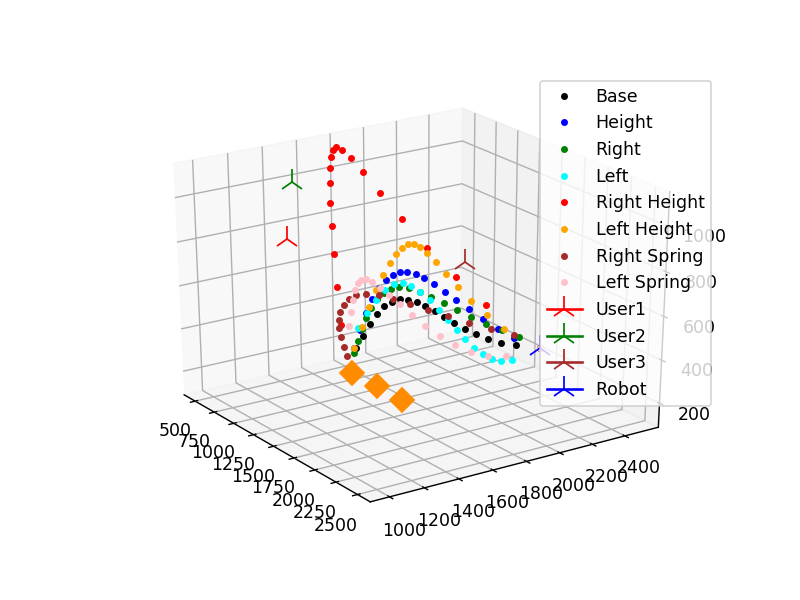

In [9]:
fig = plt.figure('Optimal Trajectories Visual')
ax = fig.add_subplot(111, projection=Axes3D.name)
for i in range(len(colors)):
    ax.plot(trajectories[i][:, 0], trajectories[i][:, 1], trajectories[i][:, 2], colors[i], label=names[i], marker='.',
            linestyle="None")
ax.plot(np.array([user1_translation[0]]), np.array([user1_translation[1]]), np.array([user1_translation[2]]),
        color='red', marker='2', markersize=15, label='User1')
ax.plot(np.array([user2_translation[0]]), np.array([user2_translation[1]]), np.array([user2_translation[2]]),
        color='green', marker='2', markersize=15, label='User2')
ax.plot(np.array([user3_translation[0]]), np.array([user3_translation[1]]), np.array([user3_translation[2]]),
        color='brown', marker='2', markersize=15, label='User3')
ax.plot(np.array([robot_translation[0]]), np.array([robot_translation[1]]), np.array([robot_translation[2]]),
        color='blue', marker='2', markersize=15, label='Robot')
ax.plot(np.array([targets['A'][0]]), np.array([targets['A'][1]]), np.array([targets['A'][2]]),
        color='darkorange', marker='D', markersize=10)
ax.plot(np.array([targets['B'][0]]), np.array([targets['B'][1]]), np.array([targets['B'][2]]),
        color='darkorange', marker='D', markersize=10)
ax.plot(np.array([targets['C'][0]]), np.array([targets['C'][1]]), np.array([targets['C'][2]]),
        color='darkorange', marker='D', markersize=10)
plt.legend(loc='best')
fig.show()